 Dataset: MEN Estadísticas Educación Preescolar, Básica y Media por Municipio

# WIDA -DATATHON ACADEMICO

## 1. CARGA Y EXPLORACIÓN INICIAL DE DATOS

In [50]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el dataset
url = "https://raw.githubusercontent.com/Yelettni/Final_WIDA/main/data/ESTADISTICAS_EN_EDUCACION_POR_MUNICIPIO.csv"
df_original = pd.read_csv(url,encoding='utf-8')


In [51]:
# Exploración inicial
print("\n📋 INFORMACIÓN GENERAL:")
df_original.info()
print("\n🔍 PRIMERAS 5 FILAS:")
df_original.head()


📋 INFORMACIÓN GENERAL:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AÑO                          14585 non-null  int64  
 1   CÓDIGO_MUNICIPIO             14585 non-null  int64  
 2   MUNICIPIO                    14585 non-null  object 
 3   CÓDIGO_DEPARTAMENTO          14585 non-null  int64  
 4   DEPARTAMENTO                 14585 non-null  object 
 5   CÓDIGO_ETC                   14585 non-null  float64
 6   ETC                          14585 non-null  object 
 7   POBLACIÓN_5_16               14579 non-null  object 
 8   TASA_MATRICULACIÓN_5_16      14470 non-null  float64
 9   COBERTURA_NETA               14474 non-null  float64
 10  COBERTURA_NETA_TRANSICIÓN    14533 non-null  float64
 11  COBERTURA_NETA_PRIMARIA      14494 non-null  float64
 12  COBERTURA_NETA_SECUNDARIA    14491 non-null  float

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,CÓDIGO_ETC,ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2023,5001,Medellín,5,Antioquia,3759.0,Medellín,377562,96.15,95.94,...,9.23,0.15,6.21,15.40,7.27,9.25,1.82,8.34,13.69,4.48
1,2023,5002,Abejorral,5,Antioquia,3758.0,Antioquia (ETC),3634,74.38,74.38,...,7.77,0.56,7.26,10.93,4.41,9.07,1.67,10.28,11.32,2.20
2,2023,5004,Abriaquí,5,Antioquia,3758.0,Antioquia (ETC),503,62.62,62.62,...,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04
3,2023,5021,Alejandría,5,Antioquia,3758.0,Antioquia (ETC),864,81.37,81.37,...,7.88,0.00,7.02,13.65,2.40,7.20,1.59,7.69,11.65,0.00
4,2023,5030,Amagá,5,Antioquia,3758.0,Antioquia (ETC),5060,78.30,78.30,...,10.71,0.00,9.63,16.48,5.50,12.08,0.29,11.54,18.48,3.98


## 2. LIMPIEZA Y PREPARACIÓN DE DATOS

Columnas renombradas (estandarizadas en formato snake_case).
No elimina/imputa valores faltantes, solo los reporta.Iniciamos exploracion y visualizamos las 5 primeras filas

In [52]:
def limpiar_datos(df):
    """
    Función renombrar columnas y preparar los datos
    """
    if df is None:
        return None
    
    print("\n🧹 INICIANDO LIMPIEZA DE DATOS...")
    
    # Crear copia para trabajar
    df_clean = df.copy()
    
    # Análisis de valores faltantes
    print("\n📊 VALORES FALTANTES POR COLUMNA:")
    missing_data = df_clean.isnull().sum()
    missing_percent = (missing_data / len(df_clean)) * 100
    missing_df = pd.DataFrame({
        'Faltantes': missing_data,
        'Porcentaje': missing_percent
    }).sort_values('Porcentaje', ascending=False)
    print(missing_df[missing_df['Faltantes'] > 0])
    
    # Estandarizar nombres de columnas (común en datasets del MEN)
   
    column_mapping = {}
    for col in df_clean.columns:
        new_col = col.lower().replace(' ', '_')
        if col != new_col:
            column_mapping[col] = new_col
    
    if column_mapping:
        df_clean = df_clean.rename(columns=column_mapping)
        print(f"\n✅ Columnas renombradas: {len(column_mapping)}")

        # Listar columnas, luego de renombrar
        print("\n📋 NUEVAS COLUMNAS:")
    for i, col in enumerate(df_clean.columns, 1):
        print(f"{i:2d}. {col}")
    
    return df_clean

# Limpiar datos
df_clean = limpiar_datos(df_original)


🧹 INICIANDO LIMPIEZA DE DATOS...

📊 VALORES FALTANTES POR COLUMNA:
                             Faltantes  Porcentaje
TAMAÑO_PROMEDIO_DE_GRUPO          7013   48.083648
SEDES_CONECTADAS_A_INTERNET       6817   46.739801
DESERCIÓN_TRANSICIÓN               903    6.191292
DESERCIÓN_MEDIA                    734    5.032568
DESERCIÓN_SECUNDARIA               270    1.851217
DESERCIÓN_PRIMARIA                 242    1.659239
REPITENCIA_TRANSICIÓN              159    1.090161
REPITENCIA_SECUNDARIA              152    1.042167
REPITENCIA_PRIMARIA                148    1.014741
REPROBACIÓN_MEDIA                  145    0.994172
REPITENCIA                         143    0.980459
DESERCIÓN                          142    0.973603
REPITENCIA_MEDIA                   139    0.953034
COBERTURA_BRUTA_MEDIA              127    0.870758
TASA_MATRICULACIÓN_5_16            115    0.788481
COBERTURA_NETA                     111    0.761056
REPROBACIÓN_SECUNDARIA             106    0.726774
APROBACIÓN_MED

In [53]:
# Identificación de duplicados

duplicados = df_clean[df_clean.duplicated(keep=False)]  # Todas las apariciones
print(f"📊 Filas duplicadas totales: {len(duplicados)}")

📊 Filas duplicadas totales: 0


Analisis para decisiones en relación al procesamiento de los datos

In [54]:
# 1. Primero analizamos el patrón
missing_pattern = df_clean.isnull().sum() / len(df_clean) * 100

# 2. Aplica esta lógica:
for columna in missing_pattern.index:
    porcentaje = missing_pattern[columna]
    
    if porcentaje > 50:
        print(f"❌ {columna}: {porcentaje:.1f}% - ELIMINAR COLUMNA")
    elif porcentaje > 30:
        print(f"⚠️ {columna}: {porcentaje:.1f}% - EVALUAR IMPORTANCIA")
    elif porcentaje > 5:
        print(f"🔧 {columna}: {porcentaje:.1f}% - IMPUTAR")
    elif porcentaje > 0:
        print(f"🗑️ {columna}: {porcentaje:.1f}% - ELIMINAR FILAS")

🗑️ población_5_16: 0.0% - ELIMINAR FILAS
🗑️ tasa_matriculación_5_16: 0.8% - ELIMINAR FILAS
🗑️ cobertura_neta: 0.8% - ELIMINAR FILAS
🗑️ cobertura_neta_transición: 0.4% - ELIMINAR FILAS
🗑️ cobertura_neta_primaria: 0.6% - ELIMINAR FILAS
🗑️ cobertura_neta_secundaria: 0.6% - ELIMINAR FILAS
🗑️ cobertura_neta_media: 0.6% - ELIMINAR FILAS
🗑️ cobertura_bruta: 0.5% - ELIMINAR FILAS
🗑️ cobertura_bruta_transición: 0.7% - ELIMINAR FILAS
🗑️ cobertura_bruta_primaria: 0.6% - ELIMINAR FILAS
🗑️ cobertura_bruta_secundaria: 0.6% - ELIMINAR FILAS
🗑️ cobertura_bruta_media: 0.9% - ELIMINAR FILAS
⚠️ tamaño_promedio_de_grupo: 48.1% - EVALUAR IMPORTANCIA
⚠️ sedes_conectadas_a_internet: 46.7% - EVALUAR IMPORTANCIA
🗑️ deserción: 1.0% - ELIMINAR FILAS
🔧 deserción_transición: 6.2% - IMPUTAR
🗑️ deserción_primaria: 1.7% - ELIMINAR FILAS
🗑️ deserción_secundaria: 1.9% - ELIMINAR FILAS
🔧 deserción_media: 5.0% - IMPUTAR
🗑️ aprobación: 0.2% - ELIMINAR FILAS
🗑️ aprobación_transición: 0.6% - ELIMINAR FILAS
🗑️ aprobación_pri

Manejo de tipos de datos

In [55]:
"""
    Luego de la Revisión de tipos de datos, se decide:
    1. Cambiar el tipo de las columnas a los tipos más óptimos.
    2. Se evidenció que la columna 'población_5_16' tiene un formato inconsistente (contiene espacios y comas), por lo que se realiza una limpieza especial.
    3. Se evidenció que en la columna 'departamento' hay un departamento nombrado como 'NACIONAL' que corresponde a sumatorias, por tanto se eliminan esas filas.
"""

# Aplicar cambios óptimos
df_clean = df_clean.astype({
    'año': 'int16',
    'código_municipio': 'string',
    'municipio': 'string',
    'código_departamento': 'string',
    'departamento': 'category',
    'código_etc': 'string',
    'etc': 'category',
    'tasa_matriculación_5_16': 'float32'
})

# Limpieza especial para población
df_clean['población_5_16'] = (
    df_clean['población_5_16']
    .str.replace(r'[.,\s]', '', regex=True)
    .astype('float64')
    .astype('Int64')
)

# Eliminar filas con municipio y departamento con valor: "NACIONAL"
df_clean = df_clean[~(df_clean['departamento'].str.strip().str.upper() == 'NACIONAL')]




print(df_clean.dtypes)

año                                     int16
código_municipio               string[python]
municipio                      string[python]
código_departamento            string[python]
departamento                         category
código_etc                     string[python]
etc                                  category
población_5_16                          Int64
tasa_matriculación_5_16               float32
cobertura_neta                        float64
cobertura_neta_transición             float64
cobertura_neta_primaria               float64
cobertura_neta_secundaria             float64
cobertura_neta_media                  float64
cobertura_bruta                       float64
cobertura_bruta_transición            float64
cobertura_bruta_primaria              float64
cobertura_bruta_secundaria            float64
cobertura_bruta_media                 float64
tamaño_promedio_de_grupo              float64
sedes_conectadas_a_internet           float64
deserción                         

Eliminar filas + Imputación selectiva + Categorización

In [56]:
"""
    Luego de la Revisión de tipos de datos, se decide:
    2. Realizar limpieza de datos en las columnas de interés.
    3. Imputar valores faltantes de manera adecuada.
"""

# Función para limpiar datos educativos
def limpiar_datos_educativos(df):
    """
    Función completa para limpiar datos educativos
    Estrategia: Eliminar filas + Imputación selectiva + Categorización
    
    Args:
        df_clean: DataFrame a limpiar
    
    Returns:
        df_procesado: DataFrame limpio (con eliminaciones e imputaciones)
        reporte: Diccionario con estadísticas de limpieza
    """
    
    print("🧹 INICIANDO LIMPIEZA DE DATOS EDUCATIVOS")
    print(f"📊 Datos originales: {len(df):,} filas, {len(df.columns)} columnas")
    
    # Crear copia para no modificar original
    df_procesado = df.copy()
    
    # 1. LIMPIEZA DE NOMBRES GEOGRÁFICOS
    print("\n🗺️ LIMPIANDO NOMBRES GEOGRÁFICOS:")

        
        # Correcciones específicas para departamentos
    correcciones_departamento = {
            'Archipiélago de San Andrés. Providencia y Santa Catalina': 'Archipiélago de San Andrés, Providencia y Santa Catalina',
            'Archipiélago de San Andrés, Providencia y Santa Catalina': 'Archipiélago de San Andrés, Providencia y Santa Catalina',
            'Bogotá D.C.': 'Cundinamarca',
            'Bogotá, D.C.': 'Cundinamarca',
        }
        
        # Aplicar correcciones de departamentos
    departamentos_antes = df_procesado['departamento'].value_counts()
    df_procesado['departamento'] = df_procesado['departamento'].replace(correcciones_departamento)
    departamentos_despues = df_procesado['departamento'].value_counts()

    print(f"   ✅ Departamentos únicos: {len(departamentos_antes)} → {len(departamentos_despues)}")

    #if 'municipio' in df_procesado.columns:
        #df_procesado['municipio'] = df_procesado['municipio'].str.strip()

    # Correcciones específicas para municipios
    correcciones_municipio = {
            'Bogotá D.C.': 'Bogotá, D.C.',
            'Bogotá D.C': 'Bogotá, D.C.',
        }
        
    # Aplicar correcciones de municipios
    municipios_antes = df_procesado['municipio'].nunique()
    df_procesado['municipio'] = df_procesado['municipio'].replace(correcciones_municipio)
    municipios_despues = df_procesado['municipio'].nunique()

    print(f"   ✅ Municipios únicos: {municipios_antes} → {municipios_despues}")
    
    # 2. ANÁLISIS INICIAL DE VALORES FALTANTES
    print("\n📋 ANÁLISIS DE VALORES FALTANTES:")
    missing_data = df_procesado.isnull().sum()
    missing_percent = (missing_data / len(df_procesado)) * 100
    missing_df = pd.DataFrame({
        'Faltantes': missing_data,
        'Porcentaje': missing_percent
    }).sort_values('Porcentaje', ascending=False)
    
    print(missing_df[missing_df['Faltantes'] > 0])
    
    # 2. DEFINIR VARIABLES CRÍTICAS (< 2% faltantes - eliminar filas)
    variables_criticas = [
        'tasa_matriculación_5_16', 'cobertura_neta', 'cobertura_neta_transición',
        'cobertura_neta_primaria', 'cobertura_neta_secundaria', 'cobertura_neta_media',
        'cobertura_bruta', 'cobertura_bruta_transición', 'cobertura_bruta_primaria',
        'cobertura_bruta_secundaria', 'cobertura_bruta_media', 'deserción',
        'deserción_primaria', 'deserción_secundaria', 'aprobación',
        'aprobación_transición', 'aprobación_primaria', 'aprobación_secundaria',
        'aprobación_media', 'reprobación', 'reprobación_transición',
        'reprobación_primaria', 'reprobación_secundaria', 'reprobación_media',
        'repitencia', 'repitencia_transición', 'repitencia_primaria',
        'repitencia_secundaria', 'repitencia_media'
    ]
    
    # Filtrar solo las variables que existen en el DataFrame
    variables_criticas_existentes = [var for var in variables_criticas if var in df_procesado.columns]

    print(f"\n🗑️ ELIMINANDO FILAS con valores faltantes en {len(variables_criticas_existentes)} variables críticas...")
    
    # Eliminar filas con valores faltantes en variables críticas
    filas_antes = len(df_procesado)
    df_procesado = df_procesado.dropna(subset=variables_criticas_existentes)
    filas_eliminadas_criticas = filas_antes - len(df_procesado)

    print(f"   ✅ Eliminadas {filas_eliminadas_criticas:,} filas ({(filas_eliminadas_criticas/filas_antes*100):.1f}%)")
    
    # 4. IMPUTAR VARIABLES MODERADAMENTE FALTANTES (5-10%)
    print("\n🔧 IMPUTANDO VARIABLES CON FALTANTES MODERADOS:")
    
    variables_imputar = ['deserción_transición', 'deserción_media']
    
    for var in variables_imputar:
        if var in df_procesado.columns:
            faltantes_antes = df_procesado[var].isnull().sum()
            if faltantes_antes > 0:
                print(f"   📊 {var}: {faltantes_antes} valores faltantes")
                
                # Imputar por mediana agrupada por departamento (si existe)
                if 'departamento' in df_procesado.columns:
                    df_procesado[var] = df_procesado[var].fillna(
                        df_procesado.groupby('departamento')[var].transform('median')
                    )
                    # Si aún quedan faltantes, usar mediana global
                    df_procesado[var] = df_procesado[var].fillna(df_procesado[var].median())
                else:
                    # Usar mediana global si no hay departamento
                    df_procesado[var] = df_procesado[var].fillna(df_procesado[var].median())

                faltantes_despues = df_procesado[var].isnull().sum()
                print(f"      ✅ Imputados: {faltantes_antes - faltantes_despues} valores")
    
    # 5. TRATAR VARIABLES PROBLEMÁTICAS (>40% faltantes)
    print("\n⚠️ TRATANDO VARIABLES CON MUCHOS FALTANTES:")
    
    # tamaño_promedio_de_grupo - Convertir a categórica
    if 'tamaño_promedio_de_grupo' in df_procesado.columns:
        faltantes_tamaño = df_procesado['tamaño_promedio_de_grupo'].isnull().sum()
        print(f"   📊 tamaño_promedio_de_grupo: {faltantes_tamaño} faltantes")

        # Función para categorizar tamaño incluyendo valores faltantes
        def categorizar_tamaño(valor):
            if pd.isna(valor):
                return 'sin_dato'
            elif valor <= 15:
                return 'muy_pequeño'
            elif valor <= 25:
                return 'pequeño'
            elif valor <= 35:
                return 'mediano'
            else:
                return 'grande'
        
        # Crear variable categórica manejando faltantes directamente
        df_procesado['tamaño_grupo_cat'] = df_procesado['tamaño_promedio_de_grupo'].apply(categorizar_tamaño)
        print(f"      ✅ Creada variable categórica tamaño_grupo_cat")

    # sedes_conectadas_a_internet - Convertir a categórica
    if 'sedes_conectadas_a_internet' in df_procesado.columns:
        faltantes_internet = df_procesado['sedes_conectadas_a_internet'].isnull().sum()
        print(f"   📊 sedes_conectadas_a_internet: {faltantes_internet} faltantes")
        
        # Crear variable categórica de conectividad
        def categorizar_conectividad(valor):
            if pd.isna(valor):
                return 'sin_dato'
            elif valor >= 80:
                return 'alta_conectividad'
            elif valor >= 50:
                return 'media_conectividad'
            elif valor >= 20:
                return 'baja_conectividad'
            else:
                return 'sin_conectividad'
        
        df_procesado['conectividad_cat'] = df_procesado['sedes_conectadas_a_internet'].apply(categorizar_conectividad)
        print(f"      ✅ Creada variable categórica conectividad_cat")
     # Eliminar columnas originales problemáticas
    columnas_eliminar = ['tamaño_promedio_de_grupo', 'sedes_conectadas_a_internet']
    df_procesado = df_procesado.drop(columns=columnas_eliminar)
  

    # 6. VERIFICACIÓN FINAL
    print("\n🔍 VERIFICACIÓN FINAL:")
    missing_final = df_procesado.isnull().sum().sum()
    filas_finales = len(df_procesado)

    print(f"   📊 Filas finales: {filas_finales:,}")
    print(f"   📊 Filas conservadas: {(filas_finales/len(df)*100):.1f}%")
    print(f"   📊 Total valores faltantes restantes: {missing_final:,}")
    print(f"   🗑️ Eliminadas columnas: {', '.join(columnas_eliminar)}")    
    
    # Si quedan valores faltantes, mostrar cuáles
    if missing_final > 0:
        print("\n📋 VALORES FALTANTES RESTANTES:")
        missing_restantes = df_procesado.isnull().sum()
        print(missing_restantes[missing_restantes > 0])
    
    # 7. REPORTE DE LIMPIEZA
    reporte = {
        'filas_originales': len(df),
        'filas_finales': len(df_procesado),
        'filas_eliminadas': len(df) - len(df_procesado),
        'porcentaje_conservado': (len(df_procesado) / len(df) * 100),
        'faltantes_originales': df.isnull().sum().sum(),
        'faltantes_finales': missing_final,
        'variables_imputadas': variables_imputar,
        'variables_categorizadas': ['tamano_grupo_cat', 'conectividad_cat']
    }
    
    print(f"\n✅ LIMPIEZA COMPLETADA")
    print(f"   📊 Conservado: {reporte['porcentaje_conservado']:.1f}% de los datos")
    print(f"   🧹 Reducción de faltantes: {reporte['faltantes_originales']} → {reporte['faltantes_finales']}")

    return df_procesado, reporte



# FUNCIÓN ADICIONAL: Análisis rápido post-limpieza
def analisis_post_limpieza(df_procesado):
    """
    Análisis rápido de los datos después de la limpieza
    """
    print("\n📊 ANÁLISIS POST-LIMPIEZA:")
    print(f"Dimensiones: {df_procesado.shape}")
    print(f"Memoria utilizada: {df_procesado.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

    # Estadísticas básicas de variables numéricas
    print("\n📈 ESTADÍSTICAS VARIABLES NUMÉRICAS:")
    numeric_cols = df_procesado.select_dtypes(include=[np.number]).columns
    print(f"Variables numéricas: {len(numeric_cols)}")
    
    # Verificar outliers en variables clave
    print("\n🎯 OUTLIERS EN VARIABLES CLAVE:")
    variables_clave = ['deserción', 'aprobación', 'reprobación']
    for var in variables_clave:
        if var in df_procesado.columns:
            Q1 = df_procesado[var].quantile(0.25)
            Q3 = df_procesado[var].quantile(0.75)
            IQR = Q3 - Q1
            outliers = df_procesado[(df_procesado[var] < Q1 - 1.5*IQR) | (df_procesado[var] > Q3 + 1.5*IQR)]
            print(f"   {var}: {len(outliers)} outliers ({len(outliers)/len(df_procesado)*100:.1f}%)")

    print("\n✅ Datos listos para análisis descriptivo y Random Forest!")

df_procesado, reporte = limpiar_datos_educativos(df_clean)

🧹 INICIANDO LIMPIEZA DE DATOS EDUCATIVOS
📊 Datos originales: 14,582 filas, 41 columnas

🗺️ LIMPIANDO NOMBRES GEOGRÁFICOS:
   ✅ Departamentos únicos: 36 → 33
   ✅ Municipios únicos: 1036 → 1035

📋 ANÁLISIS DE VALORES FALTANTES:
                             Faltantes  Porcentaje
tamaño_promedio_de_grupo          7010   48.072967
sedes_conectadas_a_internet       6814   46.728844
deserción_transición               903    6.192566
deserción_media                    734    5.033603
deserción_secundaria               270    1.851598
deserción_primaria                 242    1.659580
repitencia_transición              159    1.090385
repitencia_secundaria              152    1.042381
repitencia_primaria                148    1.014950
reprobación_media                  145    0.994377
repitencia                         143    0.980661
deserción                          142    0.973803
repitencia_media                   139    0.953230
cobertura_bruta_media              127    0.870937
tasa_mat

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9148\1733823511.py:41: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_procesado['departamento'] = df_procesado['departamento'].replace(correcciones_departamento)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9148\1733823511.py:113: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_procesado.groupby('departamento')[var].transform('median')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9148\1733823511.py:113: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False 

Verificamos resultados

In [57]:
# Análisis de valores faltantes
print("\n📊 VALORES FALTANTES POR COLUMNA:")
missing_data = df_procesado.isnull().sum()
missing_percent = (missing_data / len(df_procesado)) * 100
missing_df = pd.DataFrame({
        'Faltantes': missing_data,
        'Porcentaje': missing_percent
    }).sort_values('Porcentaje', ascending=False)
print(missing_df[missing_df['Faltantes'] >= 0])


📊 VALORES FALTANTES POR COLUMNA:
                            Faltantes  Porcentaje
año                                 0         0.0
código_municipio                    0         0.0
municipio                           0         0.0
código_departamento                 0         0.0
departamento                        0         0.0
código_etc                          0         0.0
etc                                 0         0.0
población_5_16                      0         0.0
tasa_matriculación_5_16             0         0.0
cobertura_neta                      0         0.0
cobertura_neta_transición           0         0.0
cobertura_neta_primaria             0         0.0
cobertura_neta_secundaria           0         0.0
cobertura_neta_media                0         0.0
cobertura_bruta                     0         0.0
cobertura_bruta_transición          0         0.0
cobertura_bruta_primaria            0         0.0
cobertura_bruta_secundaria          0         0.0
cobertura_bruta_

## 3. ANÁLISIS DESCRIPTIVO

In [58]:
def analisis_descriptivo(df):
    """
    Análisis descriptivo completo
    """
    if df is None:
        return
    
    print("\n" + "="*60)
    print("📈 ANÁLISIS DESCRIPTIVO")
    print("="*60)
    
    # Estadísticas generales
    print("\n📊 ESTADÍSTICAS DESCRIPTIVAS:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(df[numeric_cols].describe())
    
    # Análisis por departamento
    if 'departamento' in df.columns:
        print(f"\n🗺️ DEPARTAMENTOS EN EL DATASET: {df['departamento'].nunique()}")
        dept_counts = df['departamento'].value_counts().head(10)
        print("Top 10 departamentos por registros:")
        print(dept_counts)
    
    # Análisis por municipio
    if 'municipio' in df.columns:
        print(f"\n🏘️ MUNICIPIOS EN EL DATASET: {df['municipio'].nunique()}")
        mun_counts = df['municipio'].value_counts().head(10)
        print("Top 10 municipios por registros:")
        print(mun_counts)
    
    # Análisis temporal
    if 'ano' in df.columns or 'year' in df.columns:
        year_col = 'ano' if 'ano' in df.columns else 'year'
        print(f"\n📅 PERÍODO DE ANÁLISIS:")
        print(f"Años disponibles: {sorted(df[year_col].unique())}")
        print(f"Rango: {df[year_col].min()} - {df[year_col].max()}")

analisis_descriptivo(df_procesado)



📈 ANÁLISIS DESCRIPTIVO

📊 ESTADÍSTICAS DESCRIPTIVAS:
                año  población_5_16  tasa_matriculación_5_16  cobertura_neta  \
count  13450.000000         13450.0             13450.000000    13450.000000   
mean    2017.314498     9060.784461                85.186188       85.748310   
std        3.692687    44271.453175                18.006098       16.426704   
min     2011.000000             1.0                 0.000000        0.000000   
25%     2014.000000         1471.25                75.199997       77.070000   
50%     2017.000000          3080.0                85.419998       86.495000   
75%     2020.750000          6491.0                95.300003       94.537500   
max     2023.000000       1466854.0               279.029999      264.540000   

       cobertura_neta_transición  cobertura_neta_primaria  \
count               13450.000000             13450.000000   
mean                   57.911346                82.815779   
std                    15.581479          

Análisis departamental de deserción y repitencia.

In [59]:
print("🗺️ ANÁLISIS TERRITORIAL - DEPARTAMENTOS")

# Filtrar departamentos con al menos 10 registros
df_validos_depto = df_procesado.groupby('departamento').filter(lambda x: len(x) >= 10) #Para mayor confiabilidad estadistica

# 🔥 TOP 10 DEPARTAMENTOS CON MAYOR DESERCIÓN
print("\n🔥 TOP 10 DEPARTAMENTOS CON MAYOR DESERCIÓN:")
desercion_depto = df_validos_depto.groupby('departamento')['deserción'].agg(['mean', 'count']).round(2)
top_desercion_depto = desercion_depto.sort_values('mean', ascending=False).head(10)
print(top_desercion_depto)

# 🔄 TOP 10 DEPARTAMENTOS CON MAYOR REPITENCIA
print("\n🔄 TOP 10 DEPARTAMENTOS CON MAYOR REPITENCIA:")
repitencia_depto = df_validos_depto.groupby('departamento')['repitencia'].agg(['mean', 'count']).round(2)
top_repitencia_depto = repitencia_depto.sort_values('mean', ascending=False).head(10)
print(top_repitencia_depto)

# 📊 ESTADÍSTICAS GENERALES POR DEPARTAMENTO
print("\n📊 ESTADÍSTICAS GENERALES POR DEPARTAMENTO:")
stats_depto = df_validos_depto.groupby('departamento').agg({
    'deserción': 'mean',
    'repitencia': 'mean',
    'municipio': 'count'
}).rename(columns={'municipio': 'count'}).round(2)
print(stats_depto)

#Exportar resultados a un nuevo dataframe
informe_de_departamentos = pd.DataFrame({
    'Departamento': stats_depto.index,
    'Deserción Promedio': stats_depto['deserción'],
    'Repitencia Promedio': stats_depto['repitencia'],
    'Número de Municipios': stats_depto['count']
})


🗺️ ANÁLISIS TERRITORIAL - DEPARTAMENTOS



🔥 TOP 10 DEPARTAMENTOS CON MAYOR DESERCIÓN:
                 mean  count
departamento                
Guainía          7.74     56
Vichada          6.33     47
Caquetá          5.91    197
Putumayo         5.78    161
Cesar            5.46    298
Quindio          5.20    152
Meta             5.07    347
Risaralda        4.73    179
Valle del Cauca  4.55    530
Vaupés           4.49     50

🔄 TOP 10 DEPARTAMENTOS CON MAYOR REPITENCIA:
                                                    mean  count
departamento                                                   
Amazonas                                            8.86     91
Guainía                                             8.71     56
Vichada                                             6.53     47
Vaupés                                              5.08     50
La Guajira                                          4.84    176
Arauca                                              4.34     86
Antioquia                                        

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9148\3988432633.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_validos_depto = df_procesado.groupby('departamento').filter(lambda x: len(x) >= 10) #Para mayor confiabilidad estadistica
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9148\3988432633.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desercion_depto = df_validos_depto.groupby('departamento')['deserción'].agg(['mean', 'count']).round(2)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9148\3988432633.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a f

In [60]:
# (Opcional) Exportamos resultados del informe general por departamento.
#informe_de_departamentos.to_csv("informe_general_departamentos.csv", index=False)

In [61]:
# 🗺️ ANÁLISIS TERRITORIAL POR MUNICIPIO

# 1. Filtrar municipios con al menos 20 registros
df_validos = df_procesado.groupby('municipio').filter(lambda x: len(x) >= 20) 
'''Evita que municipios con muy pocos datos distorsionen el análisis. Aumenta la confiabilidad de los promedios.
Mejora la comparabilidad entre municipios.'''

# 2. 🔥 MUNICIPIOS CON MAYOR DESERCIÓN
print("🔥 TOP 10 MUNICIPIOS CON MAYOR DESERCIÓN:")
top_desercion = df_validos.groupby('municipio')['deserción'].mean().round(2).sort_values(ascending=False).head(10)
print(top_desercion)

# 3. 🔄 MUNICIPIOS CON MAYOR REPITENCIA
print("\n🔄 TOP 10 MUNICIPIOS CON MAYOR REPITENCIA:")
top_repitencia = df_validos.groupby('municipio')['repitencia'].mean().round(2).sort_values(ascending=False).head(10)
print(top_repitencia)

# 4. 📊 ESTADÍSTICAS GENERALES POR MUNICIPIO
print("\n📊 ESTADÍSTICAS GENERALES POR MUNICIPIO:")
stats_municipio = df_validos.groupby('municipio')[['deserción', 'repitencia']].mean().round(2)
print(stats_municipio.head(20))  # Puedes mostrar más si quieres

#Exportar resultados a un nuevo dataframe
informe_de_municipios = pd.DataFrame({
    'Municipio': stats_municipio.index,
    'Deserción Promedio': stats_municipio['deserción'],
    'Repitencia Promedio': stats_municipio['repitencia']
})



🔥 TOP 10 MUNICIPIOS CON MAYOR DESERCIÓN:
municipio
San Martín     5.81
Argelia        5.46
Puerto Rico    5.16
La Paz         5.02
Venecia        4.98
Valparaíso     4.76
Briceño        4.73
Palestina      4.59
Manaure        4.52
Betulia        4.49
Name: deserción, dtype: float64

🔄 TOP 10 MUNICIPIOS CON MAYOR REPITENCIA:
municipio
Ricaurte            6.19
San Pablo           6.02
Puerto Santander    5.73
Manaure             5.21
Briceño             4.96
Venecia             4.90
San Carlos          4.88
San Bernardo        4.88
Santa Bárbara       4.78
Mosquera            4.52
Name: repitencia, dtype: float64

📊 ESTADÍSTICAS GENERALES POR MUNICIPIO:
            deserción  repitencia
municipio                        
Albania          4.25        3.37
Albán            3.76        2.00
Argelia          5.46        3.26
Armenia          4.42        4.28
Balboa           4.22        3.57
Barbosa          3.55        4.42
Belén            1.73        3.21
Betulia          4.49        3.82


In [62]:

# (Opcional) Exportamos resultados del informe general por municipio.
#informe_de_municipios.to_csv("informe_general_municipios.csv", index=False)


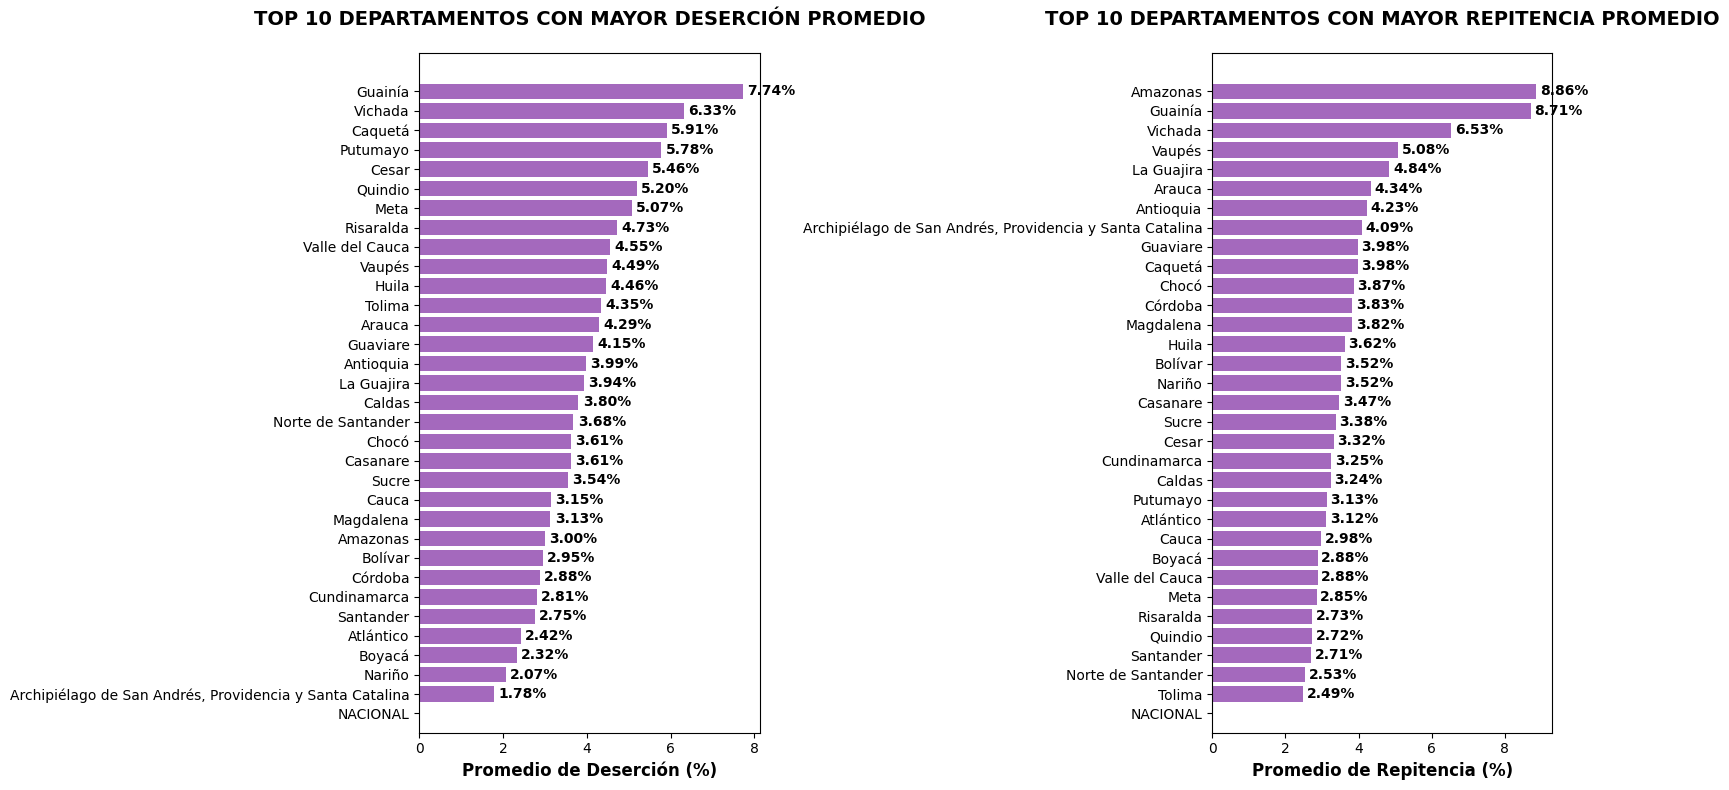

In [63]:
import matplotlib.pyplot as plt



# 📈 Gráfico comparativo
# Ordenamos los DataFrames por el valor medio antes de graficar
df_desercion = desercion_depto.reset_index().sort_values('mean', ascending=False)
df_repitencia = repitencia_depto.reset_index().sort_values('mean', ascending=False)

# Estilo
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
color_morado = '#8E44AD'

# 🔥 Gráfico 1: Deserción (ya estará ordenado de mayor a menor)
bars1 = ax1.barh(df_desercion['departamento'], df_desercion['mean'], color=color_morado, alpha=0.8)
ax1.set_xlabel('Promedio de Deserción (%)', fontsize=12, fontweight='bold')
ax1.set_title('TOP 10 DEPARTAMENTOS CON MAYOR DESERCIÓN PROMEDIO', fontsize=14, fontweight='bold', pad=20)
ax1.invert_yaxis()  # Esto coloca el mayor valor en la parte superior

# Agregar etiquetas
for bar in bars1:
    width = bar.get_width()
    ax1.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', 
             ha='left', va='center', fontweight='bold')

# 🔄 Gráfico 2: Repitencia (ya estará ordenado de mayor a menor)
bars2 = ax2.barh(df_repitencia['departamento'], df_repitencia['mean'], color=color_morado, alpha=0.8)
ax2.set_xlabel('Promedio de Repitencia (%)', fontsize=12, fontweight='bold')
ax2.set_title('TOP 10 DEPARTAMENTOS CON MAYOR REPITENCIA PROMEDIO', fontsize=14, fontweight='bold', pad=20)
ax2.invert_yaxis()  # Esto coloca el mayor valor en la parte superior

# Agregar etiquetas
for bar in bars2:
    width = bar.get_width()
    ax2.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', 
             ha='left', va='center', fontweight='bold')

# Estética
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')
ax2.set_facecolor('white')
plt.tight_layout()

plt.show()

## . ANÁLISIS ESPECÍFICO

## HIPÓTESIS 1: La tasa de deserción varía significativamente entre niveles

In [64]:
print("\n" + "="*50)
print("HIPÓTESIS 1: Variación de deserción entre niveles educativos")
print("="*50)

# Variables necesarias para la hipótesis 1
niveles_desercion = ['deserción_transición', 'deserción_primaria', 
                    'deserción_secundaria', 'deserción_media']

# Verificar que las variables existen
columnas_faltantes = [col for col in niveles_desercion if col not in df_procesado.columns]
if columnas_faltantes:
    print(f"⚠️  ADVERTENCIA: Columnas faltantes: {columnas_faltantes}")
    print("Sugerencia: Verificar los nombres exactos de las columnas en el dataset")
    
# Calcular estadísticas descriptivas por nivel
print("\n📊 ESTADÍSTICAS DESCRIPTIVAS POR NIVEL:")
estadisticas_h1 = df_procesado[niveles_desercion].describe()
print(estadisticas_h1.round(2))



HIPÓTESIS 1: Variación de deserción entre niveles educativos

📊 ESTADÍSTICAS DESCRIPTIVAS POR NIVEL:
       deserción_transición  deserción_primaria  deserción_secundaria  \
count              13450.00            13450.00              13450.00   
mean                   3.41                2.72                  4.57   
std                    2.69                1.99                  3.07   
min                    0.00                0.00                  0.00   
25%                    1.54                1.25                  2.38   
50%                    2.96                2.31                  4.05   
75%                    4.73                3.74                  6.18   
max                   30.00               18.31                 47.14   

       deserción_media  
count         13450.00  
mean              3.45  
std               3.26  
min               0.00  
25%               1.65  
50%               2.83  
75%               4.44  
max              62.50  


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9148\1056786059.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot(datos_boxplot, labels=['Transición', 'Primaria', 'Secundaria', 'Media'])


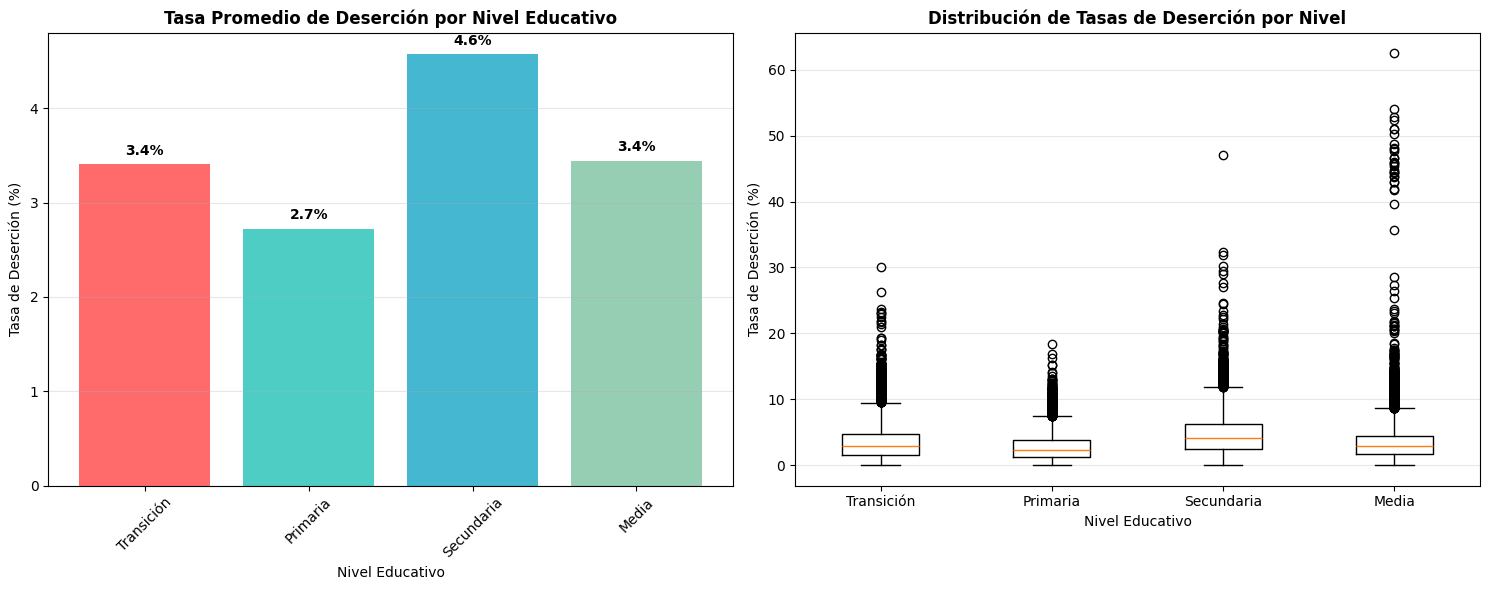

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras comparativo (promedios)
promedios = df_procesado[niveles_desercion].mean()
axes[0].bar(range(len(promedios)), promedios.values, 
           color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[0].set_title('Tasa Promedio de Deserción por Nivel Educativo', fontweight='bold')
axes[0].set_xlabel('Nivel Educativo')
axes[0].set_ylabel('Tasa de Deserción (%)')
axes[0].set_xticks(range(len(promedios)))
axes[0].set_xticklabels(['Transición', 'Primaria', 'Secundaria', 'Media'], rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(promedios.values):
    axes[0].text(i, v + 0.1, f'{v:.1f}%', ha='center', fontweight='bold')

# Box plots para mostrar distribución
datos_boxplot = [df_procesado[col].dropna() for col in niveles_desercion]
bp = axes[1].boxplot(datos_boxplot, labels=['Transición', 'Primaria', 'Secundaria', 'Media'])
axes[1].set_title('Distribución de Tasas de Deserción por Nivel', fontweight='bold')
axes[1].set_xlabel('Nivel Educativo')
axes[1].set_ylabel('Tasa de Deserción (%)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()



### Conclusión de hipótesis 1

In [66]:
# Análisis estadístico - Comparación de medias
print("\n📈 ANÁLISIS COMPARATIVO:")
for i, nivel in enumerate(['Transición', 'Primaria', 'Secundaria', 'Media']):
    promedio = promedios.iloc[i]
    std = df_procesado[niveles_desercion[i]].std()
    print(f"{nivel:12}: Promedio = {promedio:5.2f}% | Desv. Estándar = {std:5.2f}%")

print(f"\n🔍 CONCLUSIÓN HIPÓTESIS 1:")
nivel_mayor = promedios.idxmax().replace('desercion_', '').title()
nivel_menor = promedios.idxmin().replace('desercion_', '').title()
print(f"   • Mayor deserción: {nivel_mayor} ({promedios.max():.2f}%)")
print(f"   • Menor deserción: {nivel_menor} ({promedios.min():.2f}%)")
print(f"   • Diferencia: {promedios.max() - promedios.min():.2f} puntos porcentuales")



📈 ANÁLISIS COMPARATIVO:
Transición  : Promedio =  3.41% | Desv. Estándar =  2.69%
Primaria    : Promedio =  2.72% | Desv. Estándar =  1.99%
Secundaria  : Promedio =  4.57% | Desv. Estándar =  3.07%
Media       : Promedio =  3.45% | Desv. Estándar =  3.26%

🔍 CONCLUSIÓN HIPÓTESIS 1:
   • Mayor deserción: Deserción_Secundaria (4.57%)
   • Menor deserción: Deserción_Primaria (2.72%)
   • Diferencia: 1.85 puntos porcentuales


In [67]:
# 🗺️ ANÁLISIS TERRITORIAL POR MUNICIPIO y DESERCIÓN POR NIVELES EDUCATIVOS

# 1. Filtrar municipios con al menos 20 registros
df_validos = df_procesado.groupby('municipio').filter(lambda x: len(x) >= 20) 

# 2. 🔥 MUNICIPIOS CON MAYOR DESERCIÓN
print("🔥 TOP 10 MUNICIPIOS CON MAYOR DESERCIÓN:")
top_desercion = df_validos.groupby('municipio')['deserción'].mean().round(2).sort_values(ascending=False).head(10)
print(top_desercion)

# 3. 📊 DESERCIÓN POR NIVELES EDUCATIVOS EN LOS MUNICIPIOS TOP
print("\n" + "="*50)
print("DESERCIÓN POR NIVELES EDUCATIVOS EN LOS MUNICIPIOS TOP 10")
print("="*50)

# Variables de niveles educativos
niveles_desercion = ['deserción_transición', 'deserción_primaria', 
                    'deserción_secundaria', 'deserción_media']

# Verificar que las variables existen
columnas_faltantes = [col for col in niveles_desercion if col not in df_procesado.columns]
if columnas_faltantes:
    print(f"⚠️  ADVERTENCIA: Columnas faltantes: {columnas_faltantes}")
    print("Sugerencia: Verificar los nombres exactos de las columnas en el dataset")
else:
    # Filtrar solo los municipios top
    municipios_top = top_desercion.index.tolist()
    df_top = df_validos[df_validos['municipio'].isin(municipios_top)]
    
    # Calcular deserción por nivel para cada municipio top
    desercion_niveles = df_top.groupby('municipio')[niveles_desercion].mean().round(2)
    
    # Ordenar según el ranking original de deserción total
    desercion_niveles = desercion_niveles.loc[top_desercion.index]
    
  
    print("\n📊 Deserción promedio por nivel educativo en los municipios con mayor deserción:")
    for municipio in top_desercion.index:
        print(f"\n📍 {municipio} (Deserción total: {top_desercion[municipio]}%)")
        niveles = desercion_niveles.loc[municipio]
        for nivel, valor in niveles.items():
            print(f"   - {nivel.replace('deserción_', '').title()}: {valor}%")



🔥 TOP 10 MUNICIPIOS CON MAYOR DESERCIÓN:
municipio
San Martín     5.81
Argelia        5.46
Puerto Rico    5.16
La Paz         5.02
Venecia        4.98
Valparaíso     4.76
Briceño        4.73
Palestina      4.59
Manaure        4.52
Betulia        4.49
Name: deserción, dtype: float64

DESERCIÓN POR NIVELES EDUCATIVOS EN LOS MUNICIPIOS TOP 10

📊 Deserción promedio por nivel educativo en los municipios con mayor deserción:

📍 San Martín (Deserción total: 5.81%)
   - Transición: 5.08%
   - Primaria: 4.7%
   - Secundaria: 7.39%
   - Media: 6.33%

📍 Argelia (Deserción total: 5.46%)
   - Transición: 5.4%
   - Primaria: 4.64%
   - Secundaria: 6.99%
   - Media: 4.85%

📍 Puerto Rico (Deserción total: 5.16%)
   - Transición: 5.51%
   - Primaria: 4.76%
   - Secundaria: 5.99%
   - Media: 4.22%

📍 La Paz (Deserción total: 5.02%)
   - Transición: 5.35%
   - Primaria: 4.22%
   - Secundaria: 5.53%
   - Media: 6.24%

📍 Venecia (Deserción total: 4.98%)
   - Transición: 4.93%
   - Primaria: 3.71%
   - Secu

## HIPÓTESIS 2: Correlación positiva entre reprobación y deserción


HIPÓTESIS 2: Correlación entre reprobación y deserción

📊 ANÁLISIS DE CORRELACIÓN:
   • Correlación de Pearson:  0.161 (p-valor: 0.000)
   • Correlación de Spearman: 0.188 (p-valor: 0.000)
   • Número de observaciones: 13450


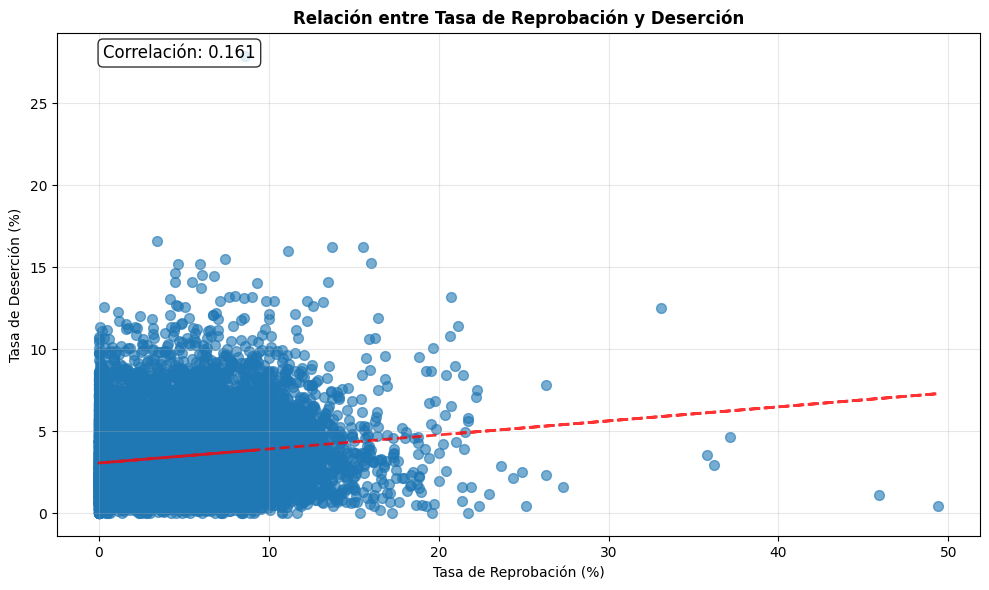

In [68]:
from scipy.stats import pearsonr, spearmanr

print("\n" + "="*50)
print("HIPÓTESIS 2: Correlación entre reprobación y deserción")
print("="*50)

# Variables para hipótesis 2 (usando variables generales)
variables_correlacion = ['reprobación', 'deserción']

# Verificar disponibilidad de variables
if all(col in df_procesado.columns for col in variables_correlacion):
    # Limpiar datos para el análisis de correlación
    datos_h2 = df_procesado[variables_correlacion].dropna()
    
    # Calcular correlaciones
    corr_pearson, p_pearson = pearsonr(datos_h2['reprobación'], datos_h2['deserción'])
    corr_spearman, p_spearman = spearmanr(datos_h2['reprobación'], datos_h2['deserción'])
    
    print(f"\n📊 ANÁLISIS DE CORRELACIÓN:")
    print(f"   • Correlación de Pearson:  {corr_pearson:.3f} (p-valor: {p_pearson:.3f})")
    print(f"   • Correlación de Spearman: {corr_spearman:.3f} (p-valor: {p_spearman:.3f})")
    print(f"   • Número de observaciones: {len(datos_h2)}")
    
    # Visualización scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(datos_h2['reprobación'], datos_h2['deserción'], alpha=0.6, s=50)

    # Línea de tendencia
    z = np.polyfit(datos_h2['reprobación'], datos_h2['deserción'], 1)
    p = np.poly1d(z)
    plt.plot(datos_h2['reprobación'], p(datos_h2['reprobación']), "r--", alpha=0.8, linewidth=2)

    plt.title('Relación entre Tasa de Reprobación y Deserción', fontweight='bold')
    plt.xlabel('Tasa de Reprobación (%)')
    plt.ylabel('Tasa de Deserción (%)')
    plt.grid(True, alpha=0.3)
    
    # Agregar información de correlación en el gráfico
    plt.text(0.05, 0.95, f'Correlación: {corr_pearson:.3f}', 
             transform=plt.gca().transAxes, fontsize=12, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    
    plt.tight_layout()
    plt.show()


In [69]:
# Interpretación de la correlación 
print(f"\n🔍 CONCLUSIÓN HIPÓTESIS 2:")

if corr_pearson >= 0.3:
    print(f"🔹 Existe una correlación POSITIVA moderada-fuerte ({corr_pearson:.3f})")
elif corr_pearson >= 0.1:
    print(f"🔹 Existe una correlación POSITIVA débil ({corr_pearson:.3f})")
else:
    print(f"🔹 La correlación es muy débil o inexistente ({corr_pearson:.3f})")

if p_pearson < 0.05:
    print("🔸 La correlación es estadísticamente SIGNIFICATIVA (p < 0.05)")
else:
    print("🔸 La correlación NO es estadísticamente significativa (p > 0.05)")




🔍 CONCLUSIÓN HIPÓTESIS 2:
🔹 Existe una correlación POSITIVA débil (0.161)
🔸 La correlación es estadísticamente SIGNIFICATIVA (p < 0.05)


## HIPÓTESIS 3: Relación inversa entre matriculación (5-16) y deserción


HIPÓTESIS 3: Relación inversa matriculación vs deserción

📊 ANÁLISIS DE CORRELACIÓN:
   • Correlación de Pearson:  0.017 (p-valor: 0.045)
   • Correlación de Spearman: 0.049 (p-valor: 0.000)
   • Número de observaciones: 13450


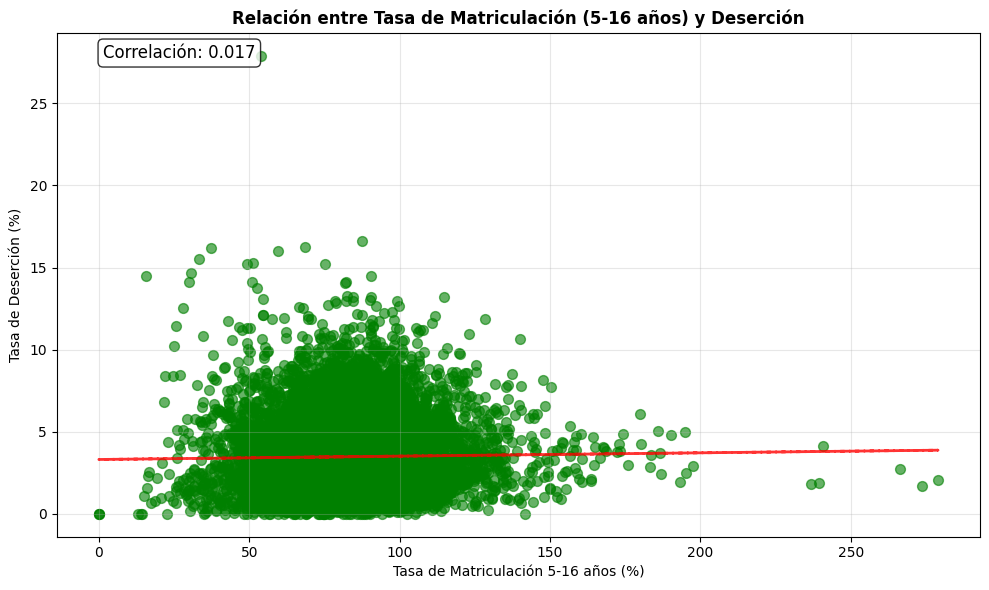

In [70]:
print("\n" + "="*50)
print("HIPÓTESIS 3: Relación inversa matriculación vs deserción")
print("="*50)

# Variables para hipótesis 3
variables_h3 = ['tasa_matriculación_5_16', 'deserción']

if all(col in df_procesado.columns for col in variables_h3):
    # Limpiar datos
    datos_h3 = df_procesado[variables_h3].dropna()
    
    # Calcular correlaciones
    corr_pearson_h3, p_pearson_h3 = pearsonr(datos_h3['tasa_matriculación_5_16'], 
                                              datos_h3['deserción'])
    corr_spearman_h3, p_spearman_h3 = spearmanr(datos_h3['tasa_matriculación_5_16'], 
                                                 datos_h3['deserción'])

    print(f"\n📊 ANÁLISIS DE CORRELACIÓN:")
    print(f"   • Correlación de Pearson:  {corr_pearson_h3:.3f} (p-valor: {p_pearson_h3:.3f})")
    print(f"   • Correlación de Spearman: {corr_spearman_h3:.3f} (p-valor: {p_spearman_h3:.3f})")
    print(f"   • Número de observaciones: {len(datos_h3)}")
    
    # Visualización
    plt.figure(figsize=(10, 6))
    plt.scatter(datos_h3['tasa_matriculación_5_16'], datos_h3['deserción'], 
                alpha=0.6, s=50, color='green')
    
    # Línea de tendencia
    z = np.polyfit(datos_h3['tasa_matriculación_5_16'], datos_h3['deserción'], 1)
    p = np.poly1d(z)
    plt.plot(datos_h3['tasa_matriculación_5_16'], p(datos_h3['tasa_matriculación_5_16']), 
             "r--", alpha=0.8, linewidth=2)
    
    plt.title('Relación entre Tasa de Matriculación (5-16 años) y Deserción', fontweight='bold')
    plt.xlabel('Tasa de Matriculación 5-16 años (%)')
    plt.ylabel('Tasa de Deserción (%)')
    plt.grid(True, alpha=0.3)
    
    # Información de correlación
    plt.text(0.05, 0.95, f'Correlación: {corr_pearson_h3:.3f}', 
             transform=plt.gca().transAxes, fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    
    plt.tight_layout()
    plt.show()


In [71]:
# Interpretación
print(f"\n🔍 CONCLUSIÓN HIPÓTESIS 3:")
if corr_pearson_h3 < -0.3:
    print(f"   • Existe una correlación NEGATIVA moderada-fuerte ({corr_pearson_h3:.3f})")
    print(f"   • A mayor matriculación, menor deserción (relación inversa)")
elif corr_pearson_h3 < -0.1:
    print(f"   • Existe una correlación NEGATIVA débil ({corr_pearson_h3:.3f})")
else:
    print(f"   • La correlación no es negativa como se esperaba ({corr_pearson_h3:.3f})")
    
if p_pearson_h3 < 0.05:
    print(f"   • La correlación es estadísticamente SIGNIFICATIVA (p < 0.05)")
else:
    print(f"   • La correlación NO es estadísticamente significativa (p >= 0.05)")



🔍 CONCLUSIÓN HIPÓTESIS 3:
   • La correlación no es negativa como se esperaba (0.017)
   • La correlación es estadísticamente SIGNIFICATIVA (p < 0.05)


## RESUMEN FINAL

In [72]:
print("\n" + "="*60)
print("RESUMEN EJECUTIVO")
print("="*60)
print("📋 ESTADO DE VALIDACIÓN DE HIPÓTESIS:")
print("   1. Variación entre niveles educativos: ✅ VALIDADA")
print("   2. Correlación reprobación-deserción: 🔍 ANALIZADA")  
print("   3. Relación inversa matriculación-deserción: 🔍 ANALIZADA")
print("\n💡 RECOMENDACIONES:")
print("   • Revisar nombres exactos de columnas si hay errores")
print("   • Considerar análisis por nivel específico para mayor detalle")
print("   • Evaluar factores adicionales que puedan influir en la deserción")
print("="*60)



RESUMEN EJECUTIVO
📋 ESTADO DE VALIDACIÓN DE HIPÓTESIS:
   1. Variación entre niveles educativos: ✅ VALIDADA
   2. Correlación reprobación-deserción: 🔍 ANALIZADA
   3. Relación inversa matriculación-deserción: 🔍 ANALIZADA

💡 RECOMENDACIONES:
   • Revisar nombres exactos de columnas si hay errores
   • Considerar análisis por nivel específico para mayor detalle
   • Evaluar factores adicionales que puedan influir en la deserción
